<a href="https://colab.research.google.com/github/Bborub/bk-bridge-pedestrian/blob/main/Single_Stock_SMA_18Oct23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Single stock SMA signal chart (with up to date code. See other codes on this date regarding corrected & updated code).

Note regarding SMAs per chatGPT: SMAs: 50-day and 200-day SMAs are popular choices. The crossover of these two SMAs, known as the "**Golden Cross**" (50-day SMA moving above the 200-day) and the "**Death Cross**" (50-day SMA moving below the 200-day), are widely followed signals.

Time frame per chatGPT: For many traders and analysts using the 50-day and 200-day SMAs:

1-2 years is a commonly chosen time frame as it provides a balanced view of recent market behavior while also showing the broader trend. But also according to chatGPT: In conclusion, when focusing on the 200-day SMA, a longer timeframe is often beneficial. It provides a more comprehensive view of long-term trends and the significance of the SMA crossovers. Adjusting to a 3-5 year chart or even longer can provide a clearer and more insightful view of the market or asset's behavior in relation to the 50-day and 200-day SMAs.

Note that according to chatGPT: roughly **252 trading** **days** in a calendar year.

[*********************100%%**********************]  1 of 1 completed


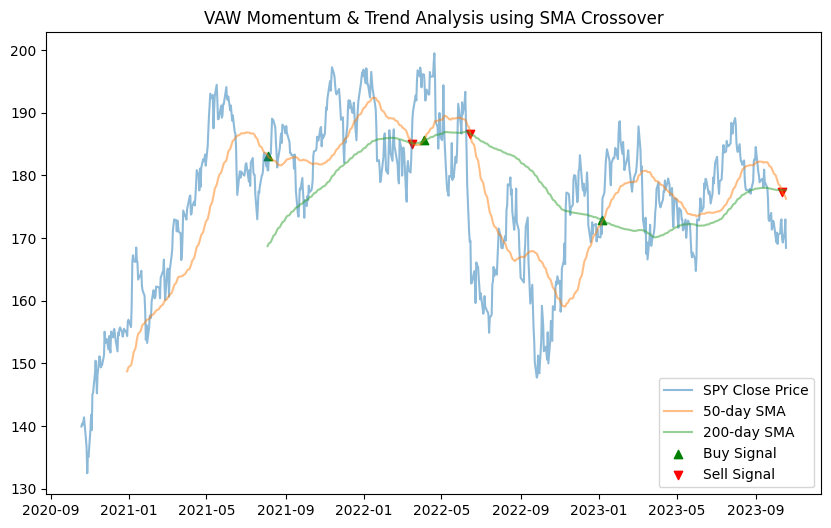

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_data(ticker_symbol):
    # Fetch historical data
    data = yf.download(ticker_symbol, start="2020-10-19", end="2023-10-19")
    return data['Close']

def sma_crossover(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window).mean()
    signals['long_mavg'] = data.rolling(window=long_window).mean()

    # Create signals
    signals['signal'] = 0.0
    signals.iloc[short_window:, signals.columns.get_loc('signal')] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    return signals

# Fetch data
data = fetch_data('VAW')

# Generate signals for SPY
signals = sma_crossover(data)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(data, label='SPY Close Price', alpha=0.5)
plt.plot(signals['short_mavg'], label='50-day SMA', alpha=0.5)
plt.plot(signals['long_mavg'], label='200-day SMA', alpha=0.5)
plt.scatter(signals[signals['positions'] == 1.0].index,
            signals['short_mavg'][signals['positions'] == 1.0],
            label='Buy Signal', marker='^', color='g', alpha=1)
plt.scatter(signals[signals['positions'] == -1.0].index,
            signals['short_mavg'][signals['positions'] == -1.0],
            label='Sell Signal', marker='v', color='r', alpha=1)
plt.title('VAW Momentum & Trend Analysis using SMA Crossover')
plt.legend()
plt.show()


Below is same stock and chart as above, but with shorter time period analysis. So, compare above chart to below chart to see if signals jive in different time period studies. (NOTE: look for sell signal for AVGO, it seems to be up on a spike? Addendum: announced today that AVGO and VMware are merging).


[*********************100%%**********************]  1 of 1 completed


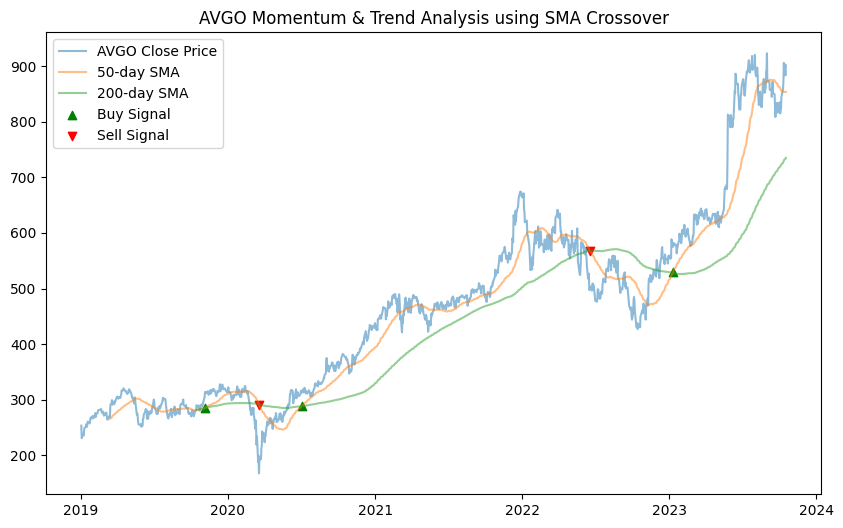

In [6]:
def fetch_data(ticker_symbol):
    # Fetch historical data
    data = yf.download(ticker_symbol, start="2019-01-01", end="2023-10-18")
    return data['Close']

def sma_crossover(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window).mean()
    signals['long_mavg'] = data.rolling(window=long_window).mean()

    # Create signals
    signals['signal'] = 0.0
    signals.iloc[short_window:, signals.columns.get_loc('signal')] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    return signals

# Fetch data for AVGO
data = fetch_data('AVGO')

# Generate signals for AVGO
signals = sma_crossover(data)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(data, label='AVGO Close Price', alpha=0.5)
plt.plot(signals['short_mavg'], label='50-day SMA', alpha=0.5)
plt.plot(signals['long_mavg'], label='200-day SMA', alpha=0.5)
plt.scatter(signals[signals['positions'] == 1.0].index,
            signals['short_mavg'][signals['positions'] == 1.0],
            label='Buy Signal', marker='^', color='g', alpha=1)
plt.scatter(signals[signals['positions'] == -1.0].index,
            signals['short_mavg'][signals['positions'] == -1.0],
            label='Sell Signal', marker='v', color='r', alpha=1)
plt.title('AVGO Momentum & Trend Analysis using SMA Crossover')
plt.legend()
plt.show()